## NYC Sales Data EDA


The dataset includes information about buildings sold in NYC, such as location and price.

**SALE_PRICE:** our target variable, the sale price of the property.

**BOROUGH:** County code

    1- Manhattan
    2- Bronx
    3- Brooklyn
    4- Queens
    5- Staten Island

**Block & LOT:** The combination of borough, block, and lot forms a unique key.

**BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE:** The type of building at various points in time.


### Import Libraries

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Upload data

In [2]:
# Read data with nan values reperesented as ' -  ', dont convert again.
file_path = "nyc-rolling-sales.csv"
df = pd.read_csv(file_path, na_values=' -  ')

In [3]:
df.shape

(84548, 22)

In [4]:
df.sample(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
59431,10033,4,FLUSHING-SOUTH,01 ONE FAMILY DWELLINGS,1,6997,52,,A5,76-35 167TH STREET,...,1,0,1,1710.0,1296.0,1950,1,A5,695000.0,2017-04-28 00:00:00
56900,7502,4,FLUSHING-NORTH,02 TWO FAMILY DWELLINGS,1,5189,19,,B1,143-53 BEECH AVENUE,...,2,0,2,2210.0,1656.0,1989,1,B1,1200000.0,2016-10-18 00:00:00
71455,22057,4,ROSEDALE,01 ONE FAMILY DWELLINGS,1,13750,115,,A2,148-75 EDGEWOOD STREET,...,1,0,1,5980.0,1025.0,1955,1,A2,412000.0,2017-01-18 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

### EDA


In [6]:
# Overview looking.
feat_desc = pd.DataFrame({'Description': df.columns, 
                          'Values': [df[i].unique() for i in df.columns],
                          'Number of unique values': [len(df[i].unique()) for i in df.columns],
                         'Number of null values': [df[i].isnull().sum() for i in df.columns]})
feat_desc

,Description,Values,Number of unique values,Number of null values
0,Unnamed: 0,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...",26736,0
1,BOROUGH,"[1, 2, 3, 4, 5]",5,0
2,NEIGHBORHOOD,"[ALPHABET CITY, CHELSEA, CHINATOWN, CIVIC CENT...",254,0
3,BUILDING CLASS CATEGORY,"[07 RENTALS - WALKUP APARTMENTS , ...",47,0
4,TAX CLASS AT PRESENT,"[2A, 2, 2B, 2C, , 4, 1, 1C, 3, 1A, 1B]",11,0
5,BLOCK,"[392, 399, 402, 404, 405, 406, 407, 379, 387, ...",11566,0
6,LOT,"[6, 26, 39, 21, 55, 16, 32, 18, 34, 153, 44, 4...",2627,0
7,EASE-MENT,[ ],1,0
8,BUILDING CLASS AT PRESENT,"[C2, C7, C4, D5, D9, D7, D1, C6, D0, D4, RR, ...",167,0
9,ADDRESS,"[153 AVENUE B, 234 EAST 4TH STREET, 197 EAST...",67563,0


#### Missing values

There are missing values in LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE columns. EASE-MENT is completelty empty. 

I will remove meaningless and completely empty features and fill the mostly filled ones with the group median value.

<AxesSubplot:>

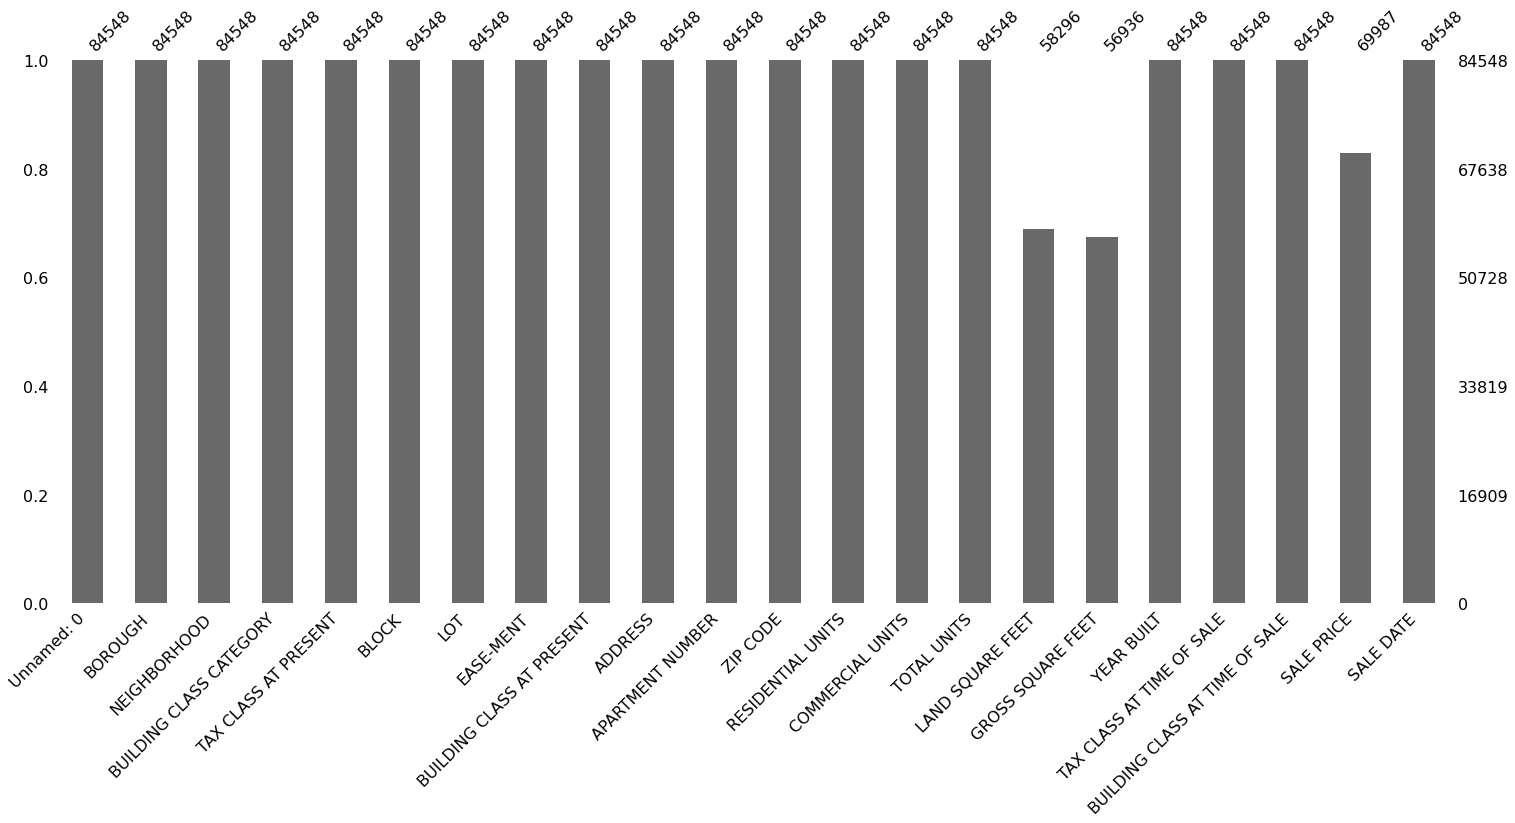

In [7]:
msno.bar(df)

In [8]:
del df['Unnamed: 0']
del df["EASE-MENT"]

There may be variability between different categories when filling in missing values. For example, the number of square meters of residences in one province is large, and the apartments in another province are smaller than 10 square meters.

Therefore, it is necessary to *fill the nan values with the mean/median values of the groups*. I found the BOROUGH variable sufficient for now, other categories can be included in this grouping if necessary.

#### Fill missing values

In [9]:
df['GROSS SQUARE FEET']=df.groupby('BOROUGH')['GROSS SQUARE FEET'].apply(lambda x:x.fillna(x.median()))
df['SALE PRICE']=df.groupby('BOROUGH')['SALE PRICE'].apply(lambda x:x.fillna(x.median()))
df['LAND SQUARE FEET']=df.groupby('BOROUGH')['LAND SQUARE FEET'].apply(lambda x:x.fillna(x.median()))

#### Create time columns

In [78]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['year'] = df['SALE DATE'].dt.year
df['month']= df['SALE DATE'].dt.month
df["dayofweek"] = df['SALE DATE'].dt.dayofweek
df["day"] = df['SALE DATE'].dt.day

#### Lets continue with our target featur - Sales Price

Basic histogram divides the value range of continuous variables into discrete bins and shows how many values exist in each bin.



/Users/skaraderili/miniconda3/envs/nyc_sales/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/skaraderili/miniconda3/envs/nyc_sales/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


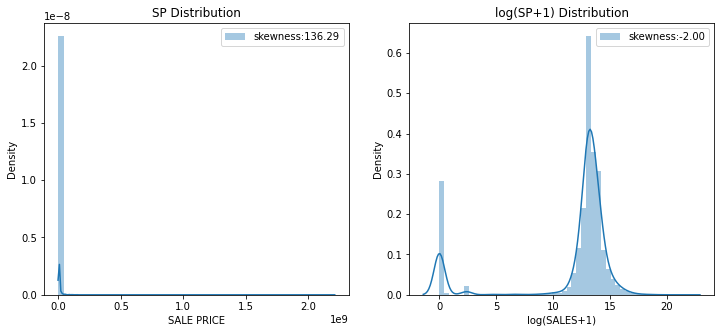

In [10]:
# check distribution of SALE PRICE 
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(df['SALE PRICE'],hist = True,label='skewness:{:.2f}'.format(df['SALE PRICE'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'SALE PRICE', ylabel = 'Density', title = 'SP Distribution')
g2 = sns.distplot(np.log1p(df['SALE PRICE']),hist = True,label='skewness:{:.2f}'.format(np.log1p(df['SALE PRICE']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(SALES+1)',ylabel = 'Density', title = 'log(SP+1) Distribution')
plt.show()

In [21]:
print("Lenght of non zero sales: ", len(df[df["SALE PRICE"] !=0]))
print("Lenght of total sales: ", len(df))

Lenght of non zero sales:  74320
Lenght of total sales:  84548


According to one source, 0 dollar sales are actually transfers of ownership between parties. 

Therefore, 0 sales prices may mislead us and we may consider them as a different category.

/Users/skaraderili/miniconda3/envs/nyc_sales/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/skaraderili/miniconda3/envs/nyc_sales/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


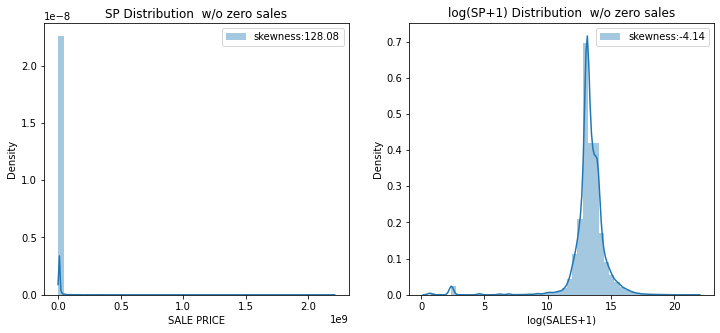

In [27]:
# check distribution of SALE PRICE w/o zero sales
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(df[df["SALE PRICE"] !=0]["SALE PRICE"],hist = True,label='skewness:{:.2f}'.format(df[df["SALE PRICE"] !=0]["SALE PRICE"].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'SALE PRICE', ylabel = 'Density', title = 'SP Distribution  w/o zero sales')
g2 = sns.distplot(np.log1p(df[df["SALE PRICE"] !=0]["SALE PRICE"]),hist = True,label='skewness:{:.2f}'.format(np.log1p(df[df["SALE PRICE"] !=0]["SALE PRICE"]).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(SALES+1)',ylabel = 'Density', title = 'log(SP+1) Distribution  w/o zero sales')
plt.show()

In [11]:
df['SALE PRICE'].describe().to_frame().astype(int).T

,count,mean,std,min,25%,50%,75%,max
SALE PRICE,84548,1170979,10380039,0,300000,495000,955000,2210000000


In [29]:
df[df["SALE PRICE"] !=0]["SALE PRICE"].describe().to_frame().astype(int).T

,count,mean,std,min,25%,50%,75%,max
SALE PRICE,74320,1332130,11061589,1,430000,560000,1090000,2210000000


#### Correlation check!

There seems to be correlation between;

    TOTAL UNITS and RESIDENTIAL UNITS
    GROSS SQUARE FEET and TOTAL UNITS
    RESIDENTIAL UNITS and GROSS SQUARE FEET
    GROSS SQUARE FEET and LAND SQUARE FEET

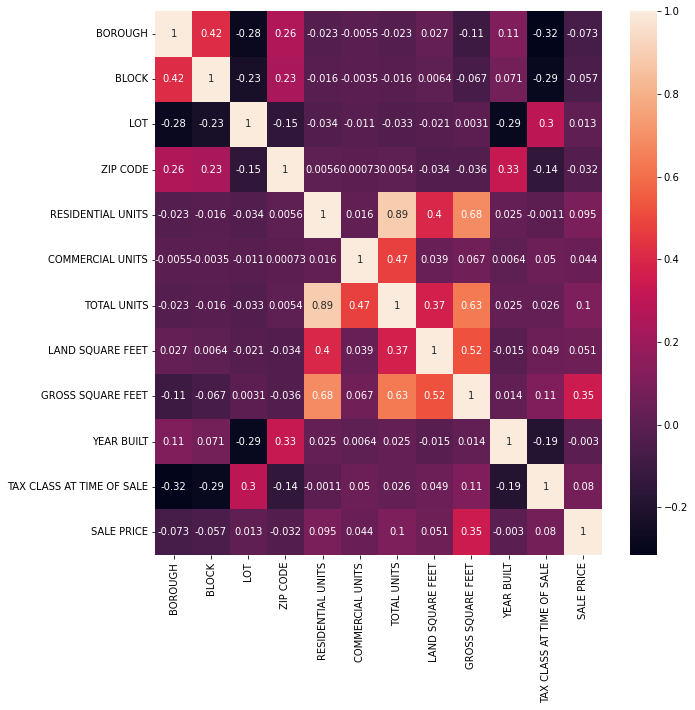

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

There are multi-collinearity between 'BUILDING CLASS AT PRESENT','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','RESIDENTIAL UNITS'

#### BLOCK
Let's look at the blocks with the highest selling price.

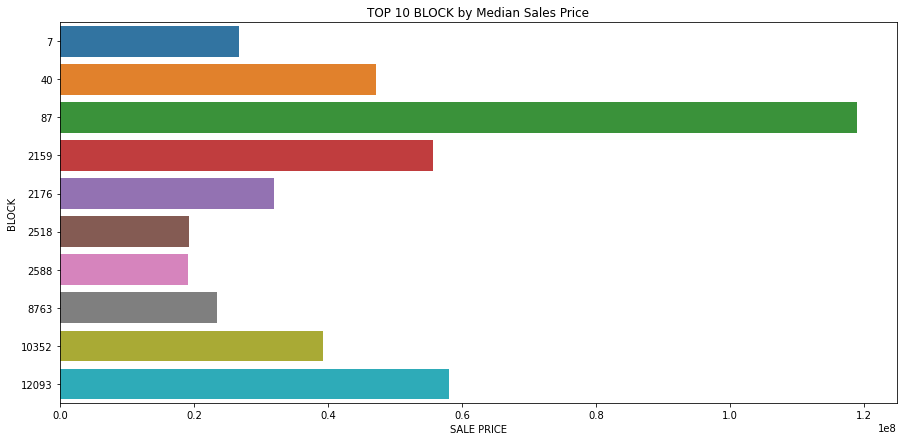

In [52]:
cat=df[["BLOCK", "SALE PRICE"]].groupby(['BLOCK'], as_index=False).median().sort_values(by='SALE PRICE', ascending=False)
plt.figure(figsize=(15,7))
sns.barplot(x='SALE PRICE', y='BLOCK', data=cat.head(10), orient = 'h').set_title("TOP 10 BLOCK by Median Sales Price")
plt.show()

#### BOROUGH

According to the boroughs, the data was not distributed very balanced, sales were realized in the 4th at most and at least in the 2nd.

It may be healthier to use a ratio such as "sales per borough area" or "total number of houses in the borough / number of houses sold" when evaluating this in the next stages.

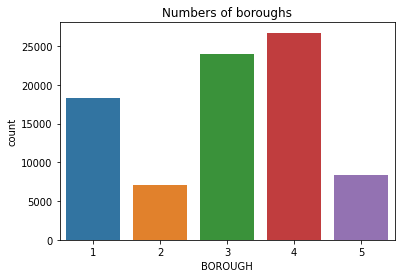

In [12]:
ax = sns.countplot(x="BOROUGH",  data=df).set_title("Numbers of boroughs")
plt.show()

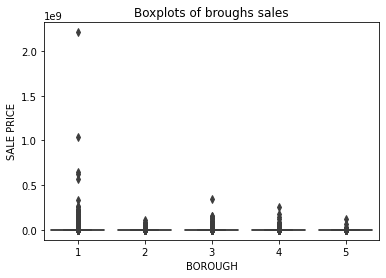

In [13]:
ax = sns.boxplot(x="BOROUGH", y="SALE PRICE", data=df).set_title("Boxplots of broughs sales")

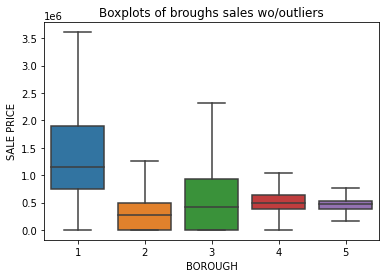

In [14]:
ax = sns.boxplot(x="BOROUGH", y="SALE PRICE", data=df, showfliers = False).set_title("Boxplots of broughs sales wo/outliers")

There are many outliers in the sale prices in the 1st borough. Although 3rd and 4th sell more, their outliers are less.



#### Units

When we look at the Total & Commercial & Residential Unit values, there are too many outlier values. It may be necessary to normalize these.

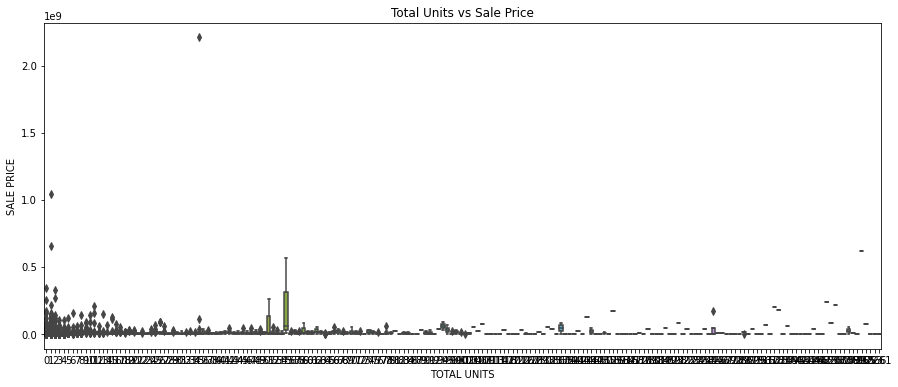

In [35]:
plt.figure(figsize=(15,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=df)
plt.title('Total Units vs Sale Price')
plt.show()

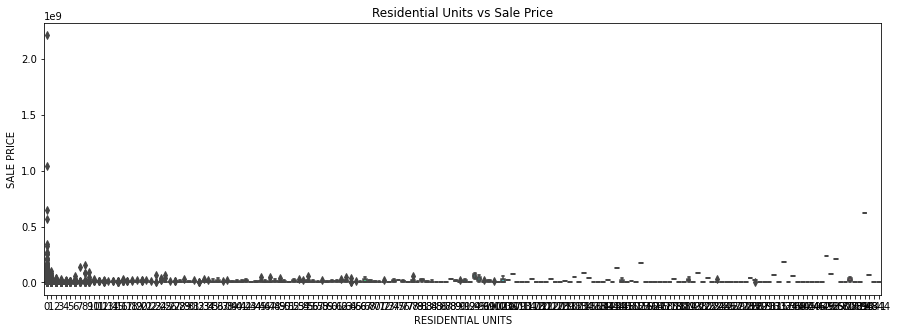

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df)
plt.title('Residential Units vs Sale Price')
plt.show()

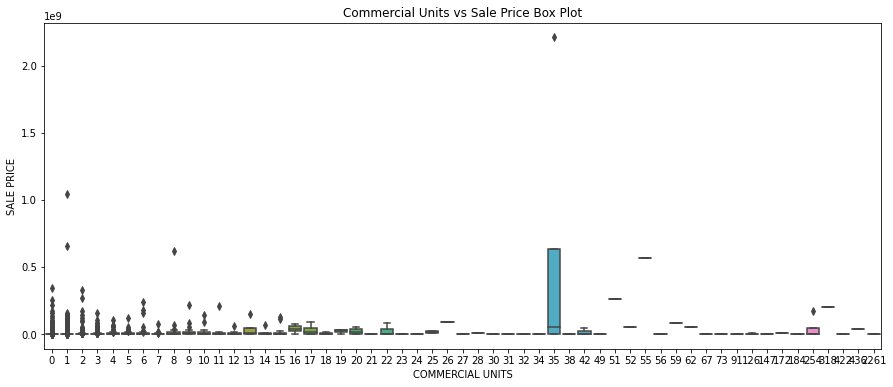

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)
plt.title('Commercial Units vs Sale Price Box Plot')
plt.show()

#### Time perspective

/Users/skaraderili/miniconda3/envs/nyc_sales/lib/python3.8/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

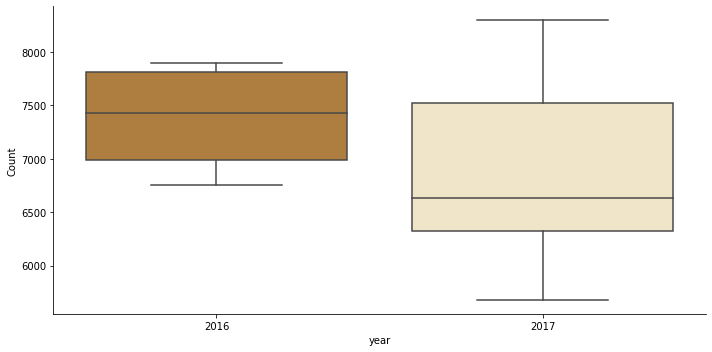

In [86]:
# YEAR
df_year_new=df.groupby(["year","month"])["SALE PRICE"].count().reset_index()
fig = plt.figure(figsize=(8,8))
with sns.color_palette("BrBG",4):
    ctplt2=sns.catplot(x="year", y="SALE PRICE",kind="box", data=df_year_new,size=5, aspect=2)
    plt.ylabel('Count')
    plt.show();

As you can see in the boxplot, there is a difference between the years, but this is because we have 4 months of data in 2016 and 8 months of data in 2017. However, there doesn't seem to be any significant difference within and between months.

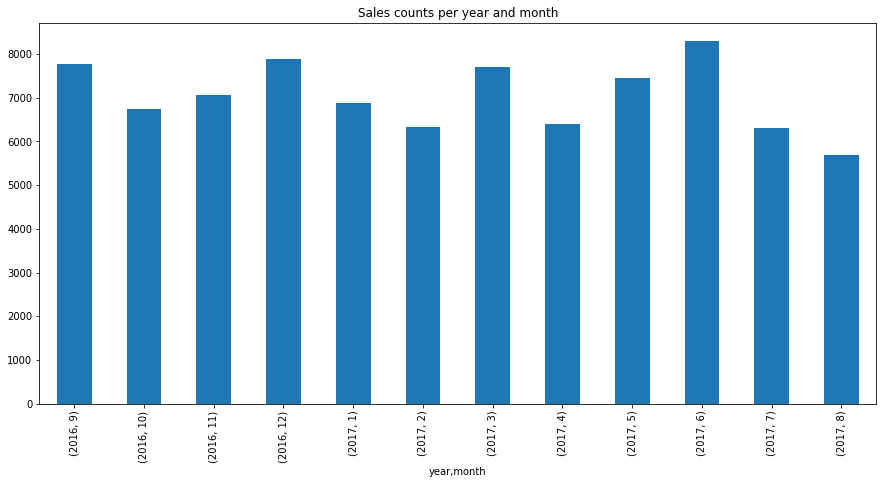

In [60]:
# MONTH
plt.figure(figsize=(15,7))
df.groupby(['year','month']).count()['SALE PRICE'].plot.bar()
plt.title('Sales counts per year and month')
plt.show()

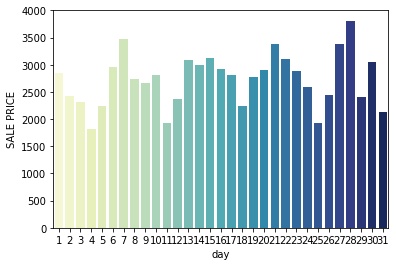

In [72]:
# Day of month
day_nums = df.groupby(['day']).count()['SALE PRICE'].to_frame().reset_index()
ax = sns.barplot(x = 'day' , y="SALE PRICE", data = day_nums,  palette='YlGnBu')

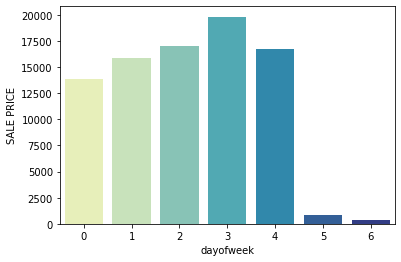

In [74]:
# Day of week
day_nums = df.groupby(['dayofweek']).count()['SALE PRICE'].to_frame().reset_index()
ax = sns.barplot(x = 'dayofweek' , y="SALE PRICE", data = day_nums,  palette='YlGnBu')

It seems that there are more sales on Wednesday, but less sales on Sunday and Saturday.

### Conclusion:

- I found out that we have a lot of categorical data, I will probably encode them in the regression task.

- I looked at which variables were correlated, and I'll look at what can be done about multicollinearity.

- I saw that the sales variable is not normally distributed, has outlier values and contains sales of $0.

- There are missing values, I can fill them with the statistical values of the groups.

- When I examine the time-based variables, it seems that the day of the week makes the most difference in sales.

With this information, we will do the cleaning and preprocessing at the modeling stage. For more *nyc2-model.ipynb*